# Pandas 데이터 핸들링

****

**발표자**  
(주)인실리코젠 DSC 박소희

**내용**  
1. 데이터 연결 (concat)
2. 데이터 병합 (merge)
3. 누락값 처리 
4. 중복 데이터 처리

**데이터 셋**  
* 데이터 연결 (concat): concat_1.csv, concat_2.csv, concat_3.csv
* 데이터 병합 (merge): survey_person.csv, survey_site.csv, survey_survey.csv, survey_visitied.csv
* 누락값 처리: country_timeseries.csv
* 중복 데이터 처리: billboard.csv

In [1]:
import pandas as pd

# 데이터 연결 (concat) 

****

**목적**: 데이터프레임을 행 또는 열 기준으로 결합하거나 연결합니다.  
**사용 사례**: **동일한 열 구조**를 가진 여러 데이터프레임을 하나로 합치거나, 새로운 행이나 열을 추가하는 데 사용됩니다.

<div style="text-align:center;">
    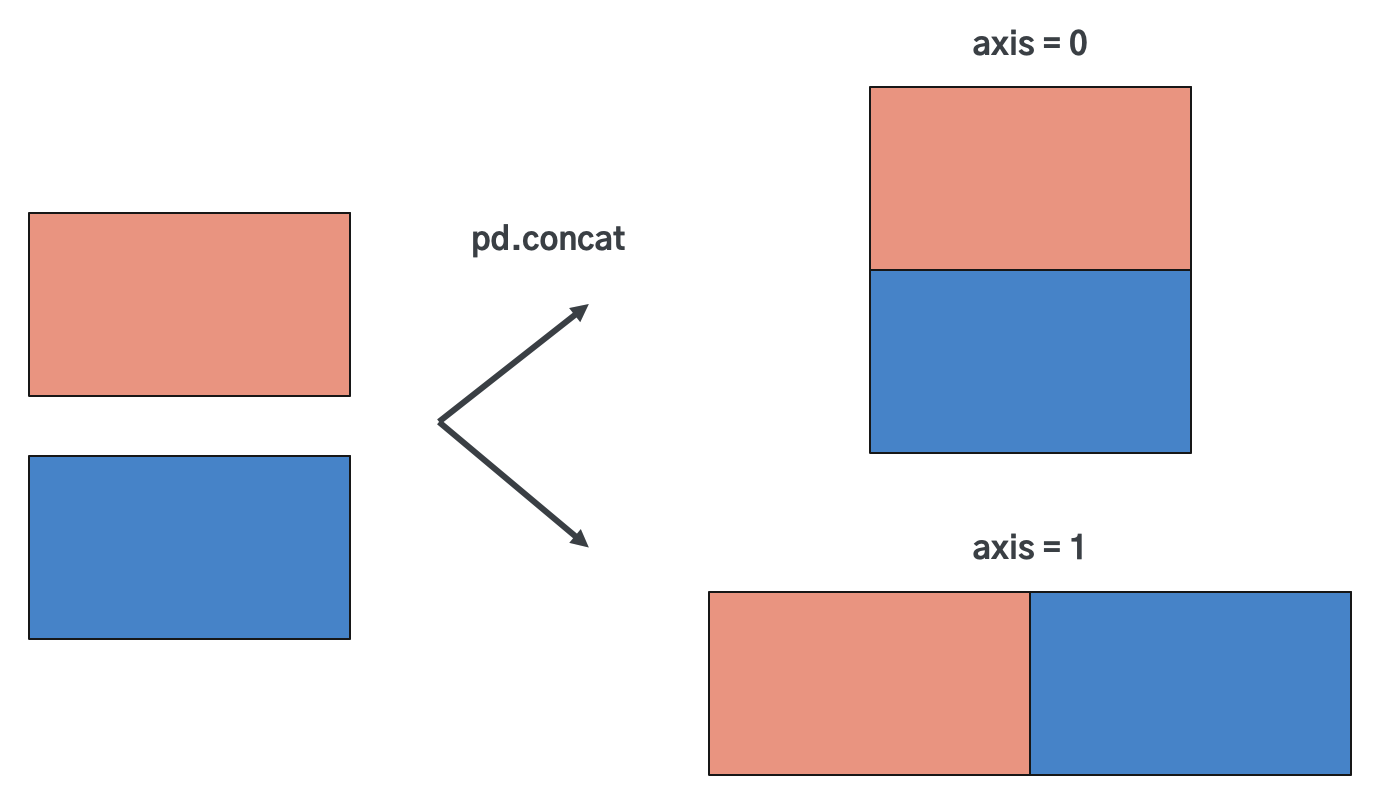
</div>

**사용법**
```python
pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=None)
```

**파라미터**

|Parameters|Input|Explanation|
|:--:|:--:|:--:|
|objs|`Series` 또는 `DataFrame`의 sequence|-|
|axis|`0` index, `1` columns|연결할 축의 방향|
|join|`outer` 합집합, `inner` 교집합|다른 축의 index를 처리하는 방법|
|ignore_index|`False`기존 index 유지, `True` 기존 index 무시|기존 index를 무시하고 싶을 때|
|keys|sequence, default `None`|계층적 index가 필요할 때|
|names |||



In [3]:
df1 = pd.read_csv('./datafile/concat_1.csv')
df2 = pd.read_csv('./datafile/concat_2.csv')
df3 = pd.read_csv('./datafile/concat_3.csv')

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

## concat 수행 예시 (default 옵션)
* 행 방향으로 데이터 프레임이 결합
* index는 보존
* outer join

In [ ]:
df_concat = pd.concat([df1, df2, df3], ignore_index=True)
df_concat

## concat 수행 예시 (열 방향)
* 같은 열 이름이 있는 데이터프레임에서는 열 이름으로 데이터를 추출하면 해당 열 이름의 데이터를 모두 추출

In [ ]:
col_concat = pd.concat([df1, df2, df3], axis = 1)
col_concat

In [ ]:
col_concat['A']

In [ ]:
# ignore_index
pd.concat([df1, df2, df3], axis = 1, ignore_index = True)

In [ ]:
# 다른 columns name을 줄 경우 
my_list = []
pd.concat([df1, df2, df3], axis = 1, ignore_index = True, names = my_list)

## concat 수행 예시 (keys 값 설정)
* 계층적 index가 구성됨
* 설정된 key 값으로 Series 혹은 Dataframe을 불러올 수 있음

In [ ]:
df_keys = pd.concat([df1, df2, df3], keys=['a','b','c'])
df_keys

In [ ]:
df_keys.loc['a']

## concat 수행 예시 (Series, DataFrame, Dictionary)

### with Series: 열이름이 없기 때문에 새로운 열로 간주

In [ ]:
new_row = pd.Series(['n1', 'n2', 'n3', 'n4'])
new_row

### 행으로 또는 열로 합친다는거 명시 

In [ ]:
pd.concat([df1, new_row], axis=0)

### with DataFrame: 공통 열로 결합

In [2]:
new_row_df = pd.DataFrame([['n1', 'n2', 'n3', 'n4']],
                          columns = ['A', 'B', 'C', 'D'])
new_row_df

,A,B,C,D
0,n1,n2,n3,n4


In [8]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2


In [ ]:
pd.concat([df1, new_row_df])

In [ ]:
pd.concat([df1, new_row_df], axis=1)

### cf) append: 행 방향으로만 결합

In [29]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2


In [30]:
new_row_df

,A,B,C,D
0,n1,n2,n3,n4


In [27]:
df1.append([new_row_df])

/var/folders/zm/q_hkpfmd4c52bmx280q27v980000gn/T/ipykernel_38485/2139514841.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append([new_row_df])


,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
0,n1,n2,n3,n4


In [28]:
data_dict = {'A' : 'n1', 'B' : 'n2', 'C' : 'n3', 'D' : 'n4'}
df1.append(data_dict, ignore_index = True)

/var/folders/zm/q_hkpfmd4c52bmx280q27v980000gn/T/ipykernel_38485/872794326.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(data_dict, ignore_index = True)


,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,n1,n2,n3,n4


In [14]:
data_dict

{'A': 'n1', 'B': 'n2', 'C': 'n3', 'D': 'n4'}

**딕셔너리는 인덱스가 없기 때문에 ignore_index가 없으면 에러**  
**ignore_index = True 로 하면 데이터를 연결한 다음 인덱스를 다시 지정**

In [22]:
concat_df1 = pd.concat([df1, df2, df3], ignore_index = True)
concat_df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8


## 공통 열과 공통 인덱스만 연결하기

In [16]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [17]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2


In [18]:
df2

,E,F,G,H
0,a3,b3,c3,d3
1,a4,b4,c4,d4
2,a5,b5,c5,d5


In [19]:
df3

,A,C,F,H
0,a6,b6,c6,d6
1,a7,b7,c7,d7
2,a8,b8,c8,d8


In [24]:
print(df1)
print(type(df1))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
<class 'pandas.core.frame.DataFrame'>


In [25]:
print(df2)

    E   F   G   H
0  a3  b3  c3  d3
1  a4  b4  c4  d4
2  a5  b5  c5  d5


In [26]:
print(df3)

    A   C   F   H
0  a6  b6  c6  d6
1  a7  b7  c7  d7
2  a8  b8  c8  d8


In [20]:
row_concat = pd.concat([df1, df2, df3])
row_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a3,b3,c3,d3
1,NaN,NaN,NaN,NaN,a4,b4,c4,d4
2,NaN,NaN,NaN,NaN,a5,b5,c5,d5
0,a6,NaN,b6,NaN,NaN,c6,NaN,d6
1,a7,NaN,b7,NaN,NaN,c7,NaN,d7
2,a8,NaN,b8,NaN,NaN,c8,NaN,d8


In [28]:
# 공통 열만 연결
pd.concat([df1, df3], ignore_index = False, join = 'inner')

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
0,a6,b6
1,a7,b7
2,a8,b8


In [29]:
pd.concat([df1, df2, df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a3,b3,c3,d3
1,NaN,NaN,NaN,NaN,a4,b4,c4,d4
2,NaN,NaN,NaN,NaN,a5,b5,c5,d5
0,a6,NaN,b6,NaN,NaN,c6,NaN,d6
1,a7,NaN,b7,NaN,NaN,c7,NaN,d7
2,a8,NaN,b8,NaN,NaN,c8,NaN,d8


In [30]:
pd.concat([df1, df2, df3], axis=1, join='outer')

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,a3,b3,c3,d3,a6,b6,c6,d6
1,a1,b1,c1,d1,a4,b4,c4,d4,a7,b7,c7,d7
2,a2,b2,c2,d2,a5,b5,c5,d5,a8,b8,c8,d8


In [31]:
pd.concat([df1, df2, df3], axis=0, join='inner')

""
0
1
2
0
1
2
0
1
2


In [32]:
pd.concat([df1, df2, df3], join = 'inner')

""
0
1
2
0
1
2
0
1
2


In [34]:
df1.index = [0, 1, 2]
df2.index = [3, 4, 5]
df3.index = [0, 2, 5]

In [35]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2


In [36]:
df2

,E,F,G,H
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [37]:
df3

,A,C,F,H
0,a6,b6,c6,d6
2,a7,b7,c7,d7
5,a8,b8,c8,d8


In [38]:
col_concat = pd.concat([df1, df2, df3], axis = 1)
col_concat

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a6,b6,c6,d6
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a7,b7,c7,d7
3,NaN,NaN,NaN,NaN,a3,b3,c3,d3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a8,b8,c8,d8


In [39]:
pd.concat([df1, df3], axis = 1, join = 'inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a6,b6,c6,d6
2,a2,b2,c2,d2,a7,b7,c7,d7


# 데이터 병합 (merge)

****

**목적**: 두 데이터프레임을 공통된 열(또는 인덱스)을 기준으로 병합니다.  
**사용 사례**: 두 데이터프레임 간에 공통된 열 또는 index를 기준으로 데이터를 병합할 때 사용됩니다.  
**특징**  
* merge는 기본적으로 내부 조인  
* merge를 사용한 데이터프레임을 왼쪽, 인자로 사용한 데이터프레임을 오른쪽으로 지정
* left_on과 right_on의 값이 일치하면 왼쪽 데이터프레임을 기준으로 연결

<div style="text-align:center;">
    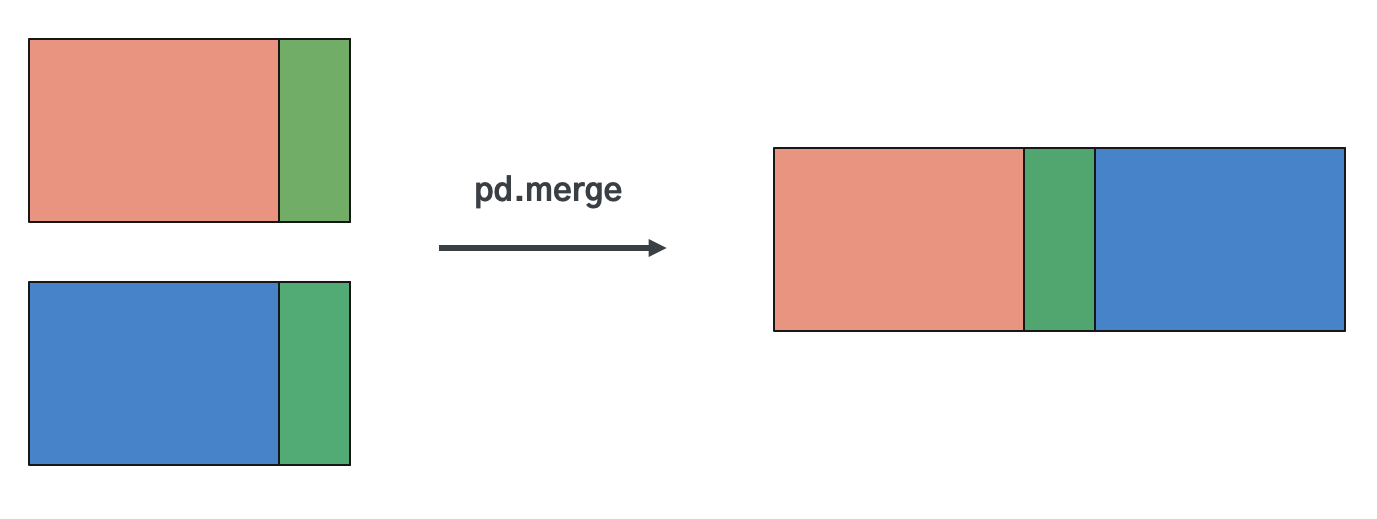
</div>


```python
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

### inner join과 outer join

- 내부 조인(inner join)
    - 둘 이상의 데이터프레임에서 조건에 맞는 행을 연결하는 것
    
- 외부 조인(outer join)
    - 두 데이터프레임 중 어떤 데이터프레임을 기준으로 할 것인지에 따라 왼쪽 외부 조인(Left Outer Join), 오른쪽 외부 조인(Right Outer Join), 완전 외부 조인(Full Outer Join)으로 나뉨
    
        - 왼쪽 외부 조인 : 왼쪽 데이터프레임을 모두 포함하여 연결
        - 오른쪽 외부 조인 : 오른쪽 데이터프레임을 모두 포함하여 연결
        - 완전 외부 조인 : 왼쪽과 오른쪽 데이터프레임을 모두 포함하여 연결
        
        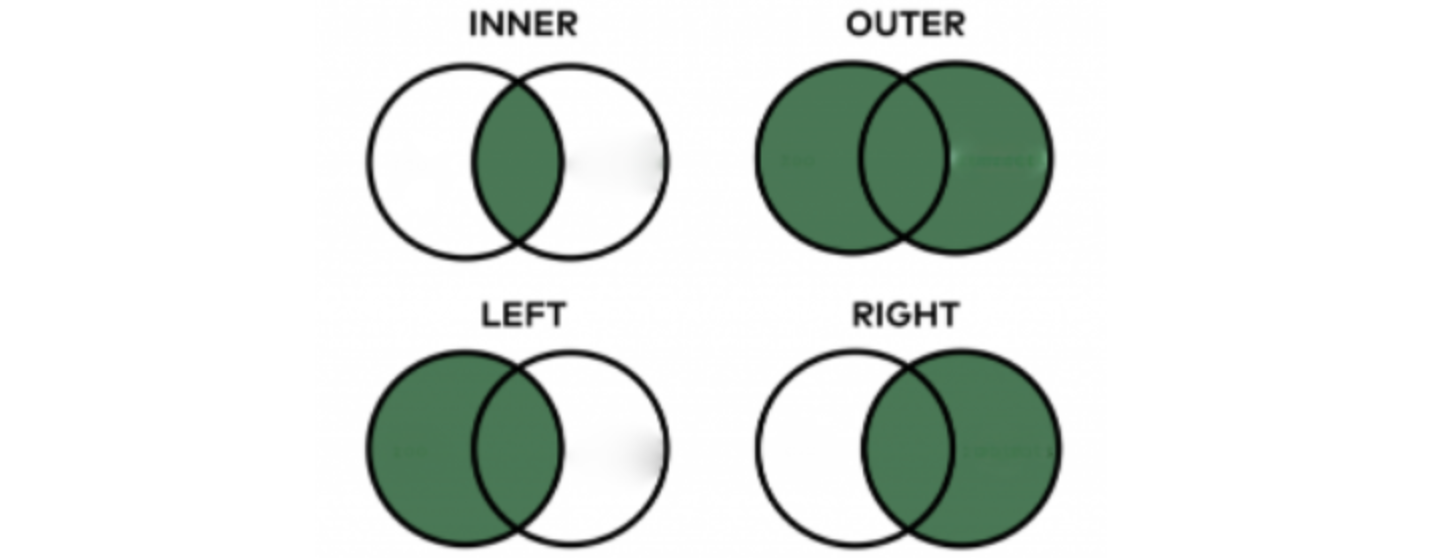

In [21]:
df1 = pd.DataFrame({'key' : list('bbacaab'), 'data1' : range(7)})
df2 = pd.DataFrame({'key' : list('abd'), 'data2' : range(3)})

In [22]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [23]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [55]:
pd.merge(df1, df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


**merge를 활용해보기 위한 데이터 프레임을 아래 코드에서 불러오세요**

In [11]:
site = pd.read_csv('./datafile/survey_site.csv')
visited = pd.read_csv('./datafile/survey_visited.csv')
survey = pd.read_csv('./datafile/survey_survey.csv')
person = pd.read_csv('./datafile/survey_person.csv')

**먼저, site와 visited 데이터 프레임이 어떻게 생겼는지 불러와보세요**

In [26]:
# 아래에 코드를 작성 후 실행해 보세요.
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [27]:
# 아래에 코드를 작성 후 실행해 보세요.
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [28]:
pd.merge(site, visited, left_on = 'name', right_on = 'site')

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [ ]:
pd.merge(site, visited, how = 'outer', on = 'site')

**다음으로 person과 survey 데이터 프레임이 어떻게 생겼는지 불러와보세요**

In [35]:
# 아래에 코드를 작성 후 실행해 보세요.
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [37]:
# 아래에 코드를 작성 후 실행해 보세요.
survey.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [64]:
person.merge(survey, left_on = 'ident', right_on = 'person')

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


# 누락값 처리

****

In [35]:
from numpy import NaN, NAN, nan
import numpy as np

In [67]:
print(pd.isnull(NaN))
print(pd.isnull(nan))
print(pd.isnull(NAN))

True
True
True


## 누락값의 개수

In [41]:
ebola = pd.read_csv('./datafile/country_timeseries.csv')

In [42]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [43]:
ebola.count()

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [71]:
len(ebola)

122

In [47]:
# 누락값의 개수
ebola.isna().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [50]:
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [75]:
ebola['Cases_Guinea'].value_counts(dropna = False)

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
235.0      1
231.0      1
226.0      1
224.0      1
2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64

In [77]:
ebola.fillna(0).iloc[:10, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


**ffill : 누락값이 나타나기 전의 값으로 채워넣기**

In [78]:
ebola.fillna(method = 'ffill').iloc[:10, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


**bfill : 누락값 이후 첫번째 값으로 앞쪽의 누락값이 변경**

In [79]:
ebola.fillna(method = 'bfill').iloc[:10, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


**interpolate() : 누락값 양쪽값의 중간값으로 처리, 데이터가 일정한 간격을 유지하고 있을 때 유용함**

In [80]:
ebola.interpolate().iloc[:10, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2749.5,8157.0,9677.5
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7997.5,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7919.5,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [ ]:
replace로 nan 변경 가능

## 누락값 삭제

In [81]:
ebola.shape

(122, 18)

In [82]:
ebola_dropna = ebola.dropna()

In [83]:
ebola_dropna

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [84]:
ebola_dropna.shape

(1, 18)

# 중복값 처리

****

In [91]:
billboard = pd.read_csv('./datafile/billboard.csv')

In [92]:
billboard_long = pd.melt(billboard,
                         id_vars = ['year', 'artist', 'track', 'time', 'date.entered'],
                         var_name = 'week',
                         value_name = 'rating')

In [93]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
billboard_long.head()

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [95]:
billboard_long['track'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24087     True
24088     True
24089     True
24090     True
24091     True
Name: track, Length: 24092, dtype: bool

In [97]:
billboard_long[billboard_long['track'].duplicated()]

,year,artist,track,time,date.entered,week,rating
258,2000,"Sheist, Shade",Where I Wanna Be,4:16,2000-11-11,wk1,96.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
318,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk2,87.0
319,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk2,70.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [99]:
billboard_long[billboard_long['track'] == 'Loser']

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
...,...,...,...,...,...,...,...
22510,2000,3 Doors Down,Loser,4:24,2000-10-21,wk72,NaN
22827,2000,3 Doors Down,Loser,4:24,2000-10-21,wk73,NaN
23144,2000,3 Doors Down,Loser,4:24,2000-10-21,wk74,NaN
23461,2000,3 Doors Down,Loser,4:24,2000-10-21,wk75,NaN


In [100]:
billboard_songs = billboard_long.drop_duplicates('track')
billboard_songs.shape

(316, 7)

In [101]:
billboard_long.shape

(24092, 7)